In [ ]:
# FLOP/s = cores * cycles/second * flops/cycle

Linear FLOPS FP64 Baseline:  0.6900497293491177
Linear FLOPS FP64 Optimized:  2.126101694915254
Linear FLOPS FP64 Optimized Unrolled:  5.525017618040874
Linear Arith Intensity: 0.22700949733611303


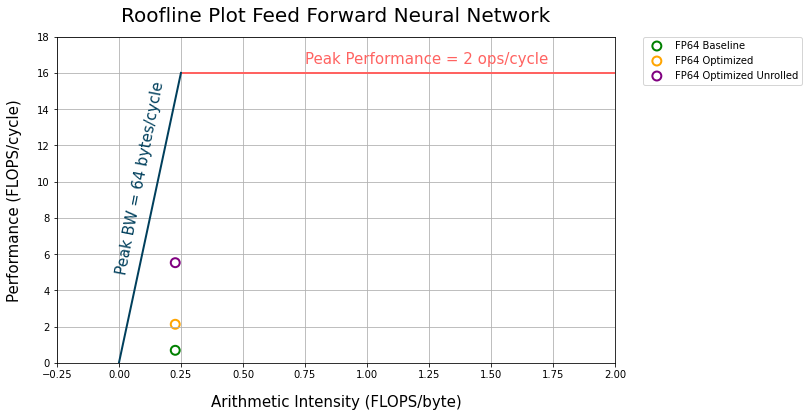

In [84]:
from tkinter.tix import ButtonBox
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 

peak_BW = 64 # bytes/cycle

IN_CH = 784
OUT_CH = 10

NUM_BYTES = 8

NUM_CORES = 8

FMAC_FLOP = 2
FMAC_FLOP_peak_per_cluster = FMAC_FLOP * NUM_CORES 

MAX_NUM_CYCLES_fp64base = 22723
MAX_NUM_CYCLES_fp64opt = 7375
MAX_NUM_CYCLES_fp64opt_unrolled = 2838
MAX_NUM_CYCLES_fp32opt = np.max([4312, 4288, 4264, 4215, 4189, 4165, 4109, 4334])

LINEAR_FLOP_TOT = IN_CH * OUT_CH * FMAC_FLOP

LINEAR_FLOPS_fp64base = (LINEAR_FLOP_TOT) / MAX_NUM_CYCLES_fp64base
LINEAR_FLOPS_fp64opt = (LINEAR_FLOP_TOT)/ MAX_NUM_CYCLES_fp64opt
LINEAR_FLOPS_fp64opt_unrolled = (LINEAR_FLOP_TOT)/ MAX_NUM_CYCLES_fp64opt_unrolled

print("Linear FLOPS FP64 Baseline: ", LINEAR_FLOPS_fp64base)
print("Linear FLOPS FP64 Optimized: ", LINEAR_FLOPS_fp64opt)
print("Linear FLOPS FP64 Optimized Unrolled: ", LINEAR_FLOPS_fp64opt_unrolled)

NUM_SIMD_VECS = 1 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
peak_performance = 2 * NUM_CORES# instructions/cycle

linear_bytes = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS

linear_flops = LINEAR_FLOP_TOT 

linear_arith_intensity = linear_flops / linear_bytes 

print("Linear Arith Intensity:", linear_arith_intensity)

# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 0.25, 100)
y = peak_BW * x 

plt.rcParams["figure.figsize"] = (10,6)
ax = plt.gca()
# ax.figsize = (10, 6)
ax.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.text(-0.02, 5, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 79, color='#003f5c')
ax.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin = 0.225, xmax = 2, linewidth=2)
# ax.plot(linear_arith_intensity, LINEAR_FLOPS, 'o', color='green', label='FP64 Baseline', markersize=10)
ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp64base, color='green', label='FP64 Baseline', s=80, facecolor='none', linewidth = 2)
ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp64opt, color='orange', label='FP64 Optimized', s=80, facecolor='none', linewidth = 2)
ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp64opt_unrolled, color='purple', label='FP64 Optimized Unrolled', s=80, facecolor='none', linewidth = 2)
# ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp32opt, color='magenta', label='FP32 Optimized', s=80, facecolor='none', linewidth = 2)
plt.text(0.75, 16.5,'Peak Performance = 2 ops/cycle', fontsize=15, color='#ff6361')
ax.set_xlim([-0.25, 2])
ax.set_ylim([0, peak_performance + 2])
# legend next to the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Feed Forward Neural Network', fontsize=20, pad=15)
plt.grid(True)

Linear FLOPS FP64 Baseline:  0.21228223703797264
Linear FLOPS FP64 Optimized:  0.9418404515070248
Linear FLOPS FP64 Optimized Unrolled:  1.81027850438529
Linear FLOPS FP64 Optimized Unrolled New:  6.36978884677856
Linear FLOPS FP64 Optimized New:  3.890542328042328
Linear Arith Intensity: 0.22700949733611303


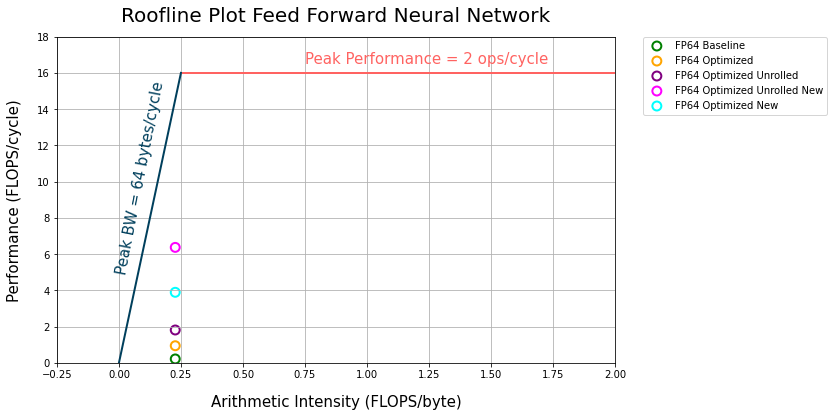

In [78]:
""" GRADIENT UPDATE FP64 """
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 

peak_BW = 64 # bytes/cycle

IN_CH = 784
OUT_CH = 10

NUM_BYTES = 8

NUM_CORES = 8

FMAC_FLOPS = 2 # * NUM_CORES ?

MAX_NUM_CYCLES_fp64base = 110843
MAX_NUM_CYCLES_fp64opt = 24983
MAX_NUM_CYCLES_fp64opt_unrolled = 12998
MAX_NUM_CYCLES_fp64opt_new = 6048
MAX_NUM_CYCLES_fp64opt_unrolled_new = 3694

LINEAR_FLOPS_fp64base = (IN_CH * OUT_CH * FMAC_FLOPS + OUT_CH + IN_CH * OUT_CH) / MAX_NUM_CYCLES_fp64base
LINEAR_FLOPS_fp64opt = (IN_CH * OUT_CH * FMAC_FLOPS + OUT_CH + IN_CH * OUT_CH)/ MAX_NUM_CYCLES_fp64opt
LINEAR_FLOPS_fp64opt_new = (IN_CH * OUT_CH * FMAC_FLOPS + OUT_CH + IN_CH * OUT_CH)/ MAX_NUM_CYCLES_fp64opt_new
LINEAR_FLOPS_fp64opt_unrolled = (IN_CH * OUT_CH * FMAC_FLOPS + OUT_CH + IN_CH * OUT_CH)/ MAX_NUM_CYCLES_fp64opt_unrolled
LINEAR_FLOPS_fp64opt_unrolled_new = (IN_CH * OUT_CH * FMAC_FLOPS + OUT_CH + IN_CH * OUT_CH)/ MAX_NUM_CYCLES_fp64opt_unrolled_new

print("Linear FLOPS FP64 Baseline: ", LINEAR_FLOPS_fp64base)
print("Linear FLOPS FP64 Optimized: ", LINEAR_FLOPS_fp64opt)
print("Linear FLOPS FP64 Optimized Unrolled: ", LINEAR_FLOPS_fp64opt_unrolled)
print("Linear FLOPS FP64 Optimized Unrolled New: ", LINEAR_FLOPS_fp64opt_unrolled_new)
print("Linear FLOPS FP64 Optimized New: ", LINEAR_FLOPS_fp64opt_new)

NUM_SIMD_VECS = 1 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
peak_performance = 2 * NUM_CORES# instructions/cycle

linear_bytes = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS

linear_flops = IN_CH * OUT_CH * FMAC_FLOPS 

linear_arith_intensity = linear_flops / linear_bytes 

print("Linear Arith Intensity:", linear_arith_intensity)

# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 0.25, 100)
y = peak_BW * x 

plt.rcParams["figure.figsize"] = (10,6)
ax = plt.gca()
# ax.figsize = (10, 6)
ax.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.text(-0.02, 5, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 79, color='#003f5c')
ax.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin = 0.225, xmax = 2, linewidth=2)
# ax.plot(linear_arith_intensity, LINEAR_FLOPS, 'o', color='green', label='FP64 Baseline', markersize=10)
ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp64base, color='green', label='FP64 Baseline', s=80, facecolor='none', linewidth = 2)
ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp64opt, color='orange', label='FP64 Optimized', s=80, facecolor='none', linewidth = 2)
ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp64opt_unrolled, color='purple', label='FP64 Optimized Unrolled', s=80, facecolor='none', linewidth = 2)
ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp64opt_unrolled_new, color='magenta', label='FP64 Optimized Unrolled New', s=80, facecolor='none', linewidth = 2)
ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp64opt_new, color='cyan', label='FP64 Optimized New', s=80, facecolor='none', linewidth = 2)
plt.text(0.75, 16.5,'Peak Performance = 2 ops/cycle', fontsize=15, color='#ff6361')
ax.set_xlim([-0.25, 2])
ax.set_ylim([0, peak_performance + 2])
# legend next to the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Gradient Update Neural Network', fontsize=20, pad=15)
plt.grid(True)

Linear FLOPS FP32 Optimized:  7.238117212736502
Linear FLOPS FP32 Optimized Unrolled:  15.606965174129353
Linear Arith Intensity: 0.9080379893444521


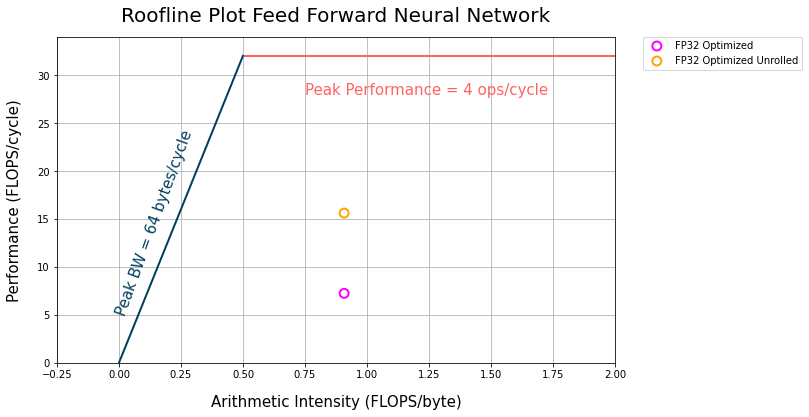

In [49]:
from tkinter.tix import ButtonBox
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 

peak_BW = 64 # bytes/cycle

IN_CH = 784
OUT_CH = 10

NUM_BYTES = 8

NUM_CORES = 8

NUM_SIMD_VECS = 2 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
FMAC_FLOPS = 2 * NUM_SIMD_VECS# * NUM_CORES ?

MAX_NUM_CYCLES_fp32opt = np.max([4312, 4288, 4264, 4215, 4189, 4165, 4109, 4334])
MAX_NUM_CYCLES_fp32opt_unrolled = np.max([1988, 1964, 1940, 1891, 1865, 1841, 1785, 2010])

LINEAR_FLOPS_fp32opt = (IN_CH * OUT_CH * FMAC_FLOPS + OUT_CH )/ MAX_NUM_CYCLES_fp32opt
LINEAR_FLOPS_fp32opt_unrolled = (IN_CH * OUT_CH * FMAC_FLOPS + OUT_CH )/ MAX_NUM_CYCLES_fp32opt_unrolled

print("Linear FLOPS FP32 Optimized: ", LINEAR_FLOPS_fp32opt)
print("Linear FLOPS FP32 Optimized Unrolled: ", LINEAR_FLOPS_fp32opt_unrolled)

peak_performance = 2 * NUM_CORES * NUM_SIMD_VECS# instructions/cycle

linear_bytes = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS

linear_flops = IN_CH * OUT_CH * FMAC_FLOPS 

linear_arith_intensity = linear_flops / linear_bytes 

print("Linear Arith Intensity:", linear_arith_intensity)

# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 0.5, 100)
y = peak_BW * x 

plt.rcParams["figure.figsize"] = (10,6)
ax = plt.gca()
# ax.figsize = (10, 6)
ax.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.text(-0.02, 5, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 70, color='#003f5c')
ax.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin = 0.3375, xmax = 2, linewidth=2)
# ax.plot(linear_arith_intensity, LINEAR_FLOPS, 'o', color='green', label='FP64 Baseline', markersize=10)
ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp32opt, color='magenta', label='FP32 Optimized', s=80, facecolor='none', linewidth = 2)
ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp32opt_unrolled, color='orange', label='FP32 Optimized Unrolled', s=80, facecolor='none', linewidth = 2)
plt.text(0.75, 28,'Peak Performance = 4 ops/cycle', fontsize=15, color='#ff6361')
ax.set_xlim([-0.25, 2])
ax.set_ylim([0, peak_performance + 2])
# legend next to the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Feed Forward Neural Network', fontsize=20, pad=15)
plt.grid(True)

Linear FLOPS FP32 Optimized:  1.5390956194065002
Linear FLOPS FP32 Optimized New:  2.5629126086672334
Linear FLOPS FP32 Optimized Unrolled:  1.4986240635988382
Linear FLOPS FP32 Optimized Unrolled New:  3.947447900936273
Linear Arith Intensity: 0.9080379893444521


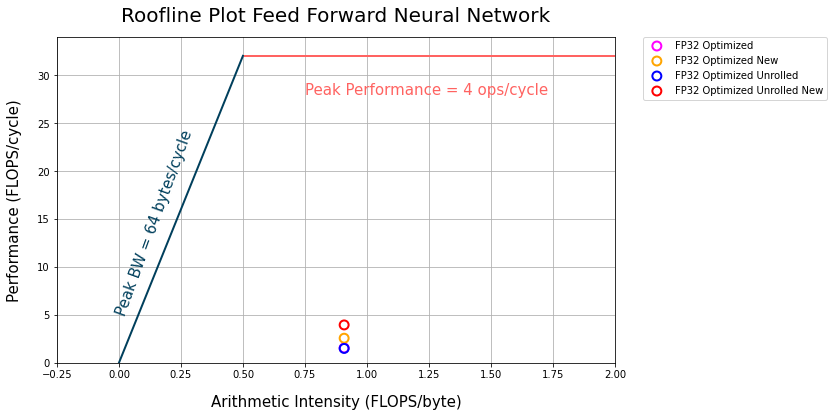

In [80]:
""" GRADIENT UPDATE FP32 """

# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle

peak_BW = 64 # bytes/cycle

IN_CH = 784
OUT_CH = 10

NUM_BYTES = 8

NUM_CORES = 8

NUM_SIMD_VECS = 2 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
FMAC_FLOPS = 2 * NUM_SIMD_VECS# * NUM_CORES ?

MAX_NUM_CYCLES_fp32opt = np.max([23753, 23678, 23651, 23574, 23553, 23480, 25476, 23771])
MAX_NUM_CYCLES_fp32opt_new = np.max([15278, 15202, 15177, 15129, 15104, 15055, 14998, 15299])
MAX_NUM_CYCLES_fp32opt_unrolled = np.max([22207, 26164, 22106, 22058, 22033, 21984, 21927, 22228])
MAX_NUM_CYCLES_fp32opt_unrolled_new = np.max([9912, 9863, 9837, 9787, 9707, 9682, 9933])

LINEAR_FLOPS_fp32opt = (IN_CH * OUT_CH * FMAC_FLOPS + OUT_CH + IN_CH * OUT_CH )/ MAX_NUM_CYCLES_fp32opt
LINEAR_FLOPS_fp32opt_new = (IN_CH * OUT_CH * FMAC_FLOPS + OUT_CH + IN_CH * OUT_CH )/ MAX_NUM_CYCLES_fp32opt_new
LINEAR_FLOPS_fp32opt_unrolled = (IN_CH * OUT_CH * FMAC_FLOPS + OUT_CH + IN_CH * OUT_CH )/ MAX_NUM_CYCLES_fp32opt_unrolled
LINEAR_FLOPS_fp32opt_unrolled_new = (IN_CH * OUT_CH * FMAC_FLOPS + OUT_CH + IN_CH * OUT_CH )/ MAX_NUM_CYCLES_fp32opt_unrolled_new

print("Linear FLOPS FP32 Optimized: ", LINEAR_FLOPS_fp32opt)
print("Linear FLOPS FP32 Optimized New: ", LINEAR_FLOPS_fp32opt_new)
print("Linear FLOPS FP32 Optimized Unrolled: ", LINEAR_FLOPS_fp32opt_unrolled)
print("Linear FLOPS FP32 Optimized Unrolled New: ", LINEAR_FLOPS_fp32opt_unrolled_new)

peak_performance = 2 * NUM_CORES * NUM_SIMD_VECS# instructions/cycle

linear_bytes = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS

linear_flops = IN_CH * OUT_CH * FMAC_FLOPS 

linear_arith_intensity = linear_flops / linear_bytes 

print("Linear Arith Intensity:", linear_arith_intensity)

# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 0.5, 100)
y = peak_BW * x

plt.rcParams["figure.figsize"] = (10,6)
ax = plt.gca()
# ax.figsize = (10, 6)
ax.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.text(-0.02, 5, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 70, color='#003f5c')
ax.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin = 0.3375, xmax = 2, linewidth=2)
# ax.plot(linear_arith_intensity, LINEAR_FLOPS, 'o', color='green', label='FP64 Baseline', markersize=10)
ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp32opt, color='magenta', label='FP32 Optimized', s=80, facecolor='none', linewidth = 2)
ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp32opt_new, color='orange', label='FP32 Optimized New', s=80, facecolor='none', linewidth = 2)
ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp32opt_unrolled, color='blue', label='FP32 Optimized Unrolled', s=80, facecolor='none', linewidth = 2)
ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp32opt_unrolled_new, color='red', label='FP32 Optimized Unrolled New', s=80, facecolor='none', linewidth = 2)
plt.text(0.75, 28,'Peak Performance = 4 ops/cycle', fontsize=15, color='#ff6361')
ax.set_xlim([-0.25, 2])
ax.set_ylim([0, peak_performance + 2])
# legend next to the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Feed Forward Neural Network', fontsize=20, pad=15)
plt.grid(True)

Linear FLOPS FP16 Optimized:  12.365464222353637
Linear FLOPS FP16 Optimized Unrolled:  15.889057750759878
Linear Arith Intensity: 3.6321519573778085


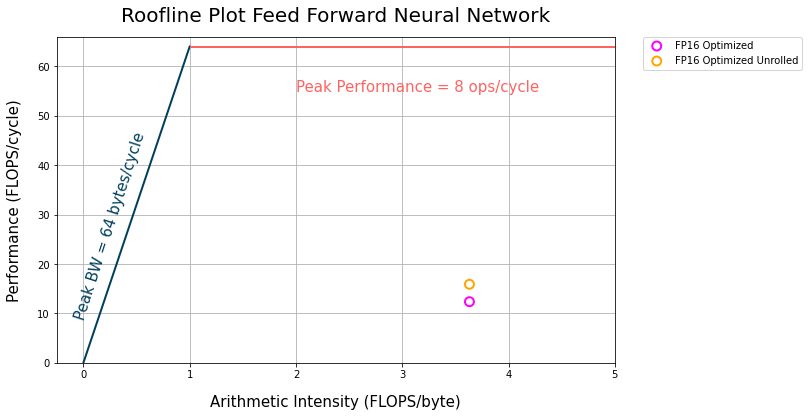

In [76]:
from tkinter.tix import ButtonBox
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 

peak_BW = 64 # bytes/cycle

IN_CH = 784
OUT_CH = 10

NUM_BYTES = 8

NUM_CORES = 8

NUM_SIMD_VECS = 4 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
FMAC_FLOPS = 2 * NUM_SIMD_VECS# * NUM_CORES ?

MAX_NUM_CYCLES_fp16opt = np.max([5051, 5027, 5003, 4954, 4928, 4904, 4848, 5073])
MAX_NUM_CYCLES_fp16opt_unrolled = np.max([3926, 3902, 3878, 3829, 3803, 3779, 3723, 3948])

LINEAR_FLOPS_fp16opt = (IN_CH * OUT_CH * FMAC_FLOPS + OUT_CH )/ MAX_NUM_CYCLES_fp16opt
LINEAR_FLOPS_fp16opt_unrolled = (IN_CH * OUT_CH * FMAC_FLOPS + OUT_CH )/ MAX_NUM_CYCLES_fp16opt_unrolled

print("Linear FLOPS FP16 Optimized: ", LINEAR_FLOPS_fp16opt)
print("Linear FLOPS FP16 Optimized Unrolled: ", LINEAR_FLOPS_fp16opt_unrolled)

peak_performance = 2 * NUM_CORES * NUM_SIMD_VECS# instructions/cycle

linear_bytes = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS

linear_flops = IN_CH * OUT_CH * FMAC_FLOPS 

linear_arith_intensity = linear_flops / linear_bytes 

print("Linear Arith Intensity:", linear_arith_intensity)

# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 1, 100)
y = peak_BW * x 

plt.rcParams["figure.figsize"] = (10,6)
ax = plt.gca()
# ax.figsize = (10, 6)
ax.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.text(-0.1, 9, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 72, color='#003f5c')
ax.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin = 0.24, xmax = 2, linewidth=2)
# ax.plot(linear_arith_intensity, LINEAR_FLOPS, 'o', color='green', label='FP64 Baseline', markersize=10)
ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp16opt, color='magenta', label='FP16 Optimized', s=80, facecolor='none', linewidth = 2)
ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp16opt_unrolled, color='orange', label='FP16 Optimized Unrolled', s=80, facecolor='none', linewidth = 2)
plt.text(2, 55,'Peak Performance = 8 ops/cycle', fontsize=15, color='#ff6361')
ax.set_xlim([-0.25, 5])
ax.set_ylim([0, peak_performance + 2])
# legend next to the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Feed Forward Neural Network', fontsize=20, pad=15)
plt.grid(True)